# No-show Appointments Dataset Analysis

### Introduction

This report investigates the Kaggle no-show appointments dataset.

In [3]:
'''All imports'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

### Data Wrangling

#### General Properties

In [4]:
# first, we read the dataset
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# get dataset dimensions
df.shape

(110527, 14)

In [6]:
# summary of all columns
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


array([[<AxesSubplot: title={'center': 'PatientId'}>,
        <AxesSubplot: title={'center': 'AppointmentID'}>,
        <AxesSubplot: title={'center': 'Age'}>],
       [<AxesSubplot: title={'center': 'Scholarship'}>,
        <AxesSubplot: title={'center': 'Hipertension'}>,
        <AxesSubplot: title={'center': 'Diabetes'}>],
       [<AxesSubplot: title={'center': 'Alcoholism'}>,
        <AxesSubplot: title={'center': 'Handcap'}>,
        <AxesSubplot: title={'center': 'SMS_received'}>]], dtype=object)

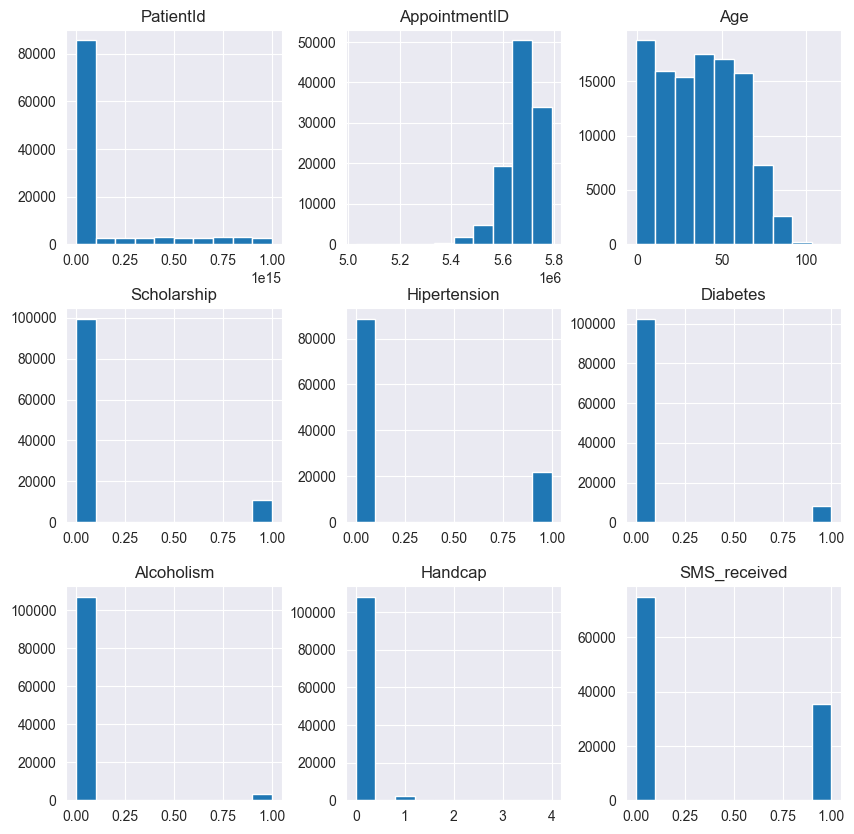

In [7]:
df.hist(figsize=(10,10))

In [8]:
# cleanup data- check for duplicates
print(df.duplicated().sum())

0


In [9]:
# number of unique patient ID
df.PatientId.nunique()

62299

In [10]:
# number of unique AppointmentID
df.AppointmentID.nunique()

110527

As a part of cleaning the data, we are dropping the 'AppointmentID', as it'll not be useful in our analysis.
Also, we need to rename misspelled columns.
We also need to examine the suspicious minimum and maximum values of 'Age' and 'Handcap':

In [11]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [12]:
# looks like there's an error in 'Age', so we have to change it to 0 in the next section
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
# 'Handcap' column has categorical values, so let's have a look at it
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [14]:
# Now let's check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [15]:
# Looks like there are no null values. Let's confirm.
df.isnull().sum().any()

False

So there are no missing values, but there are some issues with data types.  
     - **Gender** and **Handicap** needs to be transformed to category type  
     - Day columns need to be transformed to datetime type  
     - Boolean columns should be converted to bool types  
     - **NoShow** should be bool type  
     - **Neighborhood** needs further investigation in values and distribution to decide on appropriate data type

In [16]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

### Data Cleaning

Now it's time to perform the cleaning steps mentioned above

In [17]:
# Drop AppointmentID column
df.drop(['AppointmentID'], axis=1, inplace=True)

In [18]:
# Renaming misspelled columns
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'},
          inplace=True)

# See changes
df.head(5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
# After dropping the ID column, there'll be some duplicates
print(df.duplicated().sum())

618


In [20]:
# Let's check some of the duplicates
df_dup = df[df.duplicated()]
df_dup.head(5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
154,1.925263e+10,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
369,4.341600e+14,F,2016-04-29T09:43:15Z,2016-04-29T00:00:00Z,39,PRAIA DO CANTO,0,0,0,0,0,0,No
371,4.497415e+09,F,2016-04-19T11:16:27Z,2016-04-29T00:00:00Z,11,BELA VISTA,0,0,0,0,0,0,No
466,5.161239e+12,F,2016-04-27T13:16:02Z,2016-04-29T00:00:00Z,49,CONSOLAÇÃO,0,0,0,0,0,0,No
554,4.916356e+12,M,2016-03-29T12:40:26Z,2016-04-29T00:00:00Z,40,CENTRO,0,0,0,0,0,0,Yes


Deleting **AppointmentID** created 618 duplicate values- which could be an error, or could also be valid, given that patients can be scheduled for more than one appointment at the same time.
We are keeping the duplicates in the data set and treat them as separate appointments.

In [21]:
# Let's change Age=-1 to Age=0, a realistic value
df['Age'].replace({-1: 0}, inplace=True)

In [22]:
# check if it is changed
df['Age'].value_counts()

0      3540
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [23]:
# Change Data Types
for category in ['Gender', 'Neighbourhood', 'Handicap']:
    df[category] = df[category].astype('category')

In [24]:
# Day column data type to datetime
for category in ['ScheduledDay', 'AppointmentDay']:
    df[category] = pd.to_datetime(df[category])

In [25]:
# Change mentioned columns' Data Types to bool
for category in ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMSReceived']:
    df[category] = df[category].astype('bool')

In [26]:
# NoSHow column transformation
df['NoShow'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['NoShow'] = df['NoShow'].astype('bool')

In [27]:
# Check changed data types
df.dtypes

PatientId                     float64
Gender                       category
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                category
Scholarship                      bool
Hypertension                     bool
Diabetes                         bool
Alcoholism                       bool
Handicap                     category
SMSReceived                      bool
NoShow                           bool
dtype: object

In [28]:
# Check column summary
df.describe(include='all', datetime_is_numeric=True)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
count,1.105270e+05,110527,110527,110527,110527.000000,110527,110527,110527,110527,110527,110527.0,110527,110527
unique,NaN,2,NaN,NaN,NaN,81,2,2,2,2,5.0,2,2
top,NaN,F,NaN,NaN,NaN,JARDIM CAMBURI,False,False,False,False,0.0,False,False
freq,NaN,71840,NaN,NaN,NaN,7717,99666,88726,102584,107167,108286.0,75045,88208
mean,1.474963e+14,NaN,2016-05-09 07:49:15.846273024+00:00,2016-05-19 00:57:50.008233472+00:00,37.088883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.921784e+04,NaN,2015-11-10 07:13:56+00:00,2016-04-29 00:00:00+00:00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.172614e+12,NaN,2016-04-29 10:27:01+00:00,2016-05-09 00:00:00+00:00,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.173184e+13,NaN,2016-05-10 12:13:17+00:00,2016-05-18 00:00:00+00:00,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.439172e+13,NaN,2016-05-20 11:18:37+00:00,2016-05-31 00:00:00+00:00,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,9.999816e+14,NaN,2016-06-08 20:07:23+00:00,2016-06-08 00:00:00+00:00,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Check few rows of cleaned data
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,False
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,False
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,False
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,False


### Exploratory Data Analysis

#### 1. Group of patients that show up less for their scheduled appointments

In [30]:
# Let's define a function 'countplot' that'll be usable in subplot
def count_plot(dfdata, xdata, gxlabel, gylabel, gtitle, gcolor=None, gpalette=None):
    g = sns.countplot(data= dfdata,
                      x = xdata,
                      color = gcolor,
                      palette = gpalette)
    plt.title(gtitle)
    plt.xlabel(gxlabel)
    plt.ylabel(gylabel)
    return g

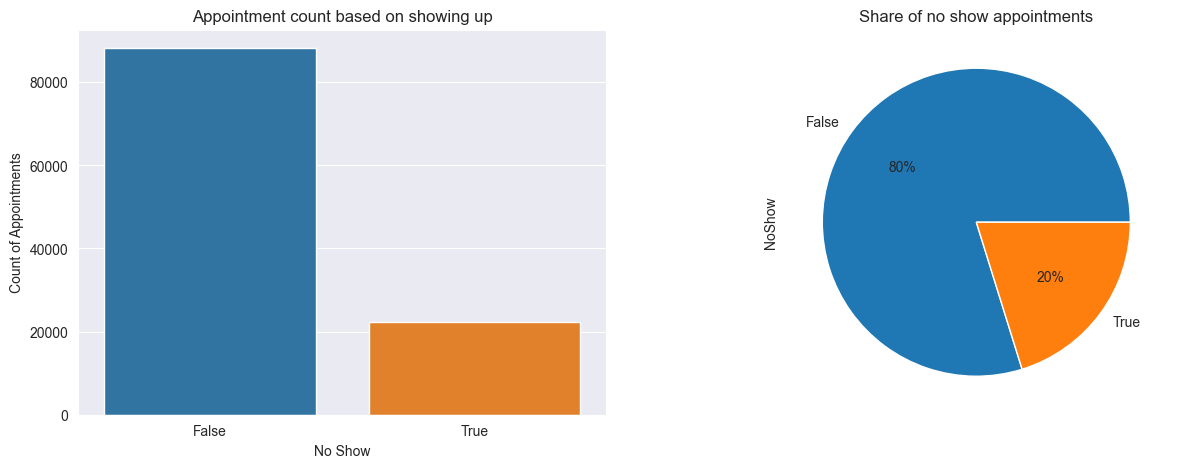

In [31]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
count_plot(df, 'NoShow', 'No Show', 'Count of Appointments', 'Appointment count based on showing up')

plt.subplot(1, 2, 2)
df.NoShow.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Share of no show appointments')
plt.show()

In [33]:
# calculate total count of no show in data
noshow_totals = df.groupby('NoShow').count()['Age']
noshow_totals

NoShow
False    88208
True     22319
Name: Age, dtype: int64

In [34]:
noshow_proportion = df['NoShow'].sum() / len(df.index)
noshow_proportion

0.20193255946510807

So, around 20% of the appointments are No Show

In [36]:
# Find the correlation
df.corr(numeric_only=True).style.background_gradient(cmap='Greens')

,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMSReceived,NoShow
PatientId,1.000000,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.009749,-0.001461
Age,-0.004139,1.000000,-0.092457,0.504586,0.292392,0.095811,0.012643,-0.060319
Scholarship,-0.002880,-0.092457,1.000000,-0.019729,-0.024894,0.035022,0.001194,0.029135
Hypertension,-0.006441,0.504586,-0.019729,1.000000,0.433086,0.087971,-0.006267,-0.035701
Diabetes,0.001605,0.292392,-0.024894,0.433086,1.000000,0.018474,-0.014550,-0.015180
Alcoholism,0.011011,0.095811,0.035022,0.087971,0.018474,1.000000,-0.026147,-0.000196
SMSReceived,-0.009749,0.012643,0.001194,-0.006267,-0.014550,-0.026147,1.000000,0.126431
NoShow,-0.001461,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,0.126431,1.000000


As per the table, the highest correlation is for:  
    - Hypertension and Age  
    - Hypertension and Diabetes  
    - Diabetes and Age  

##### Age

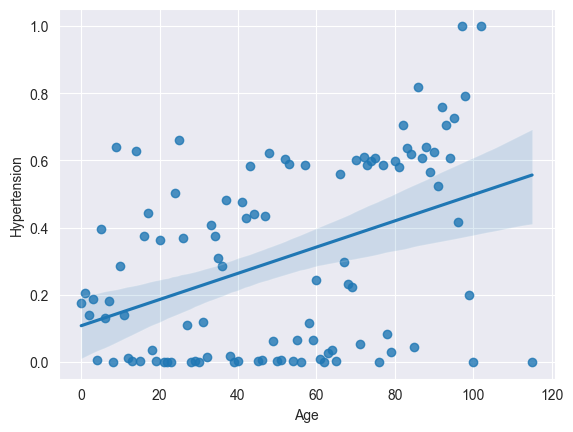

In [37]:
hypertension_mean = df['Hypertension'].groupby(df['Age']).mean()
age = df['Age'].unique()
sns.regplot(x= age, y= hypertension_mean)
plt.xlabel('Age')
plt.show()

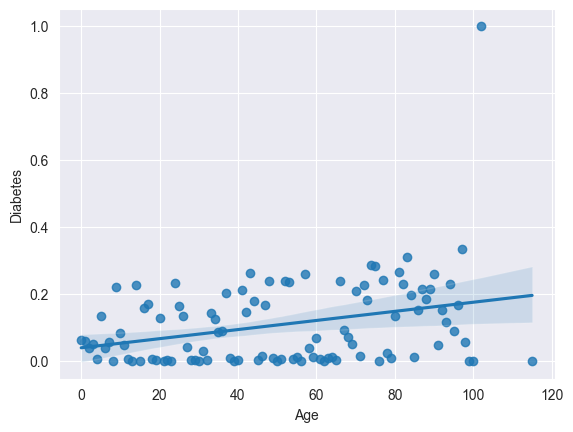

In [38]:
diabetes_mean = df['Diabetes'].groupby(df['Age']).mean()
age = df['Age'].unique()
sns.regplot(x= age, y= diabetes_mean)
plt.xlabel('Age')
plt.show()

In [40]:
# In both graphs, the outlined point is caused by someone who has both hypertension and diabetes, at age >= 99
df.query('Age >= 99').head(15)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
58014,9.762948e+14,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,False,False,False,False,0,False,False
63912,3.196321e+13,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,1,False,True
63915,3.196321e+13,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,1,False,True
68127,3.196321e+13,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,1,False,True
76284,3.196321e+13,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,1,False,False
79270,9.739430e+12,M,2016-05-30 16:21:56+00:00,2016-05-31 00:00:00+00:00,100,TABUAZEIRO,False,False,False,False,1,False,False
79272,9.739430e+12,M,2016-05-30 16:21:56+00:00,2016-05-31 00:00:00+00:00,100,TABUAZEIRO,False,False,False,False,1,False,False
90372,2.342836e+11,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,False,False,False,False,0,False,False
92084,5.578313e+13,F,2016-05-06 14:55:36+00:00,2016-06-03 00:00:00+00:00,100,ANTÔNIO HONÓRIO,False,False,False,False,0,True,False
97647,3.661577e+10,F,2016-06-06 09:46:34+00:00,2016-06-06 00:00:00+00:00,99,SANTO ANTÔNIO,False,True,True,False,0,False,False


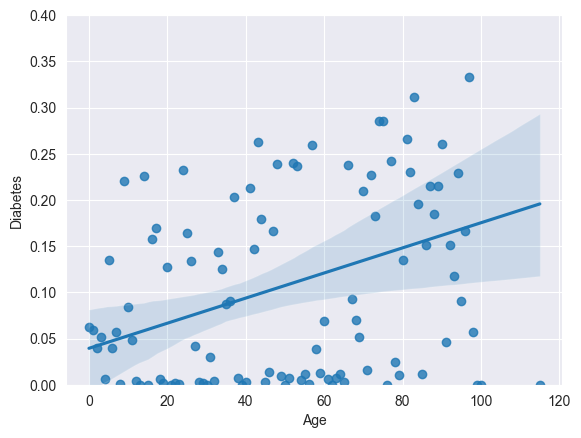

In [41]:
# To see the correlation better, let's cut out this particular patient's data
diabetes_mean = df['Diabetes'].groupby(df['Age']).mean()
age = df['Age'].unique()
sns.regplot(x= age, y= diabetes_mean)
plt.xlabel('Age')
plt.ylim(0, 0.4)
plt.show()

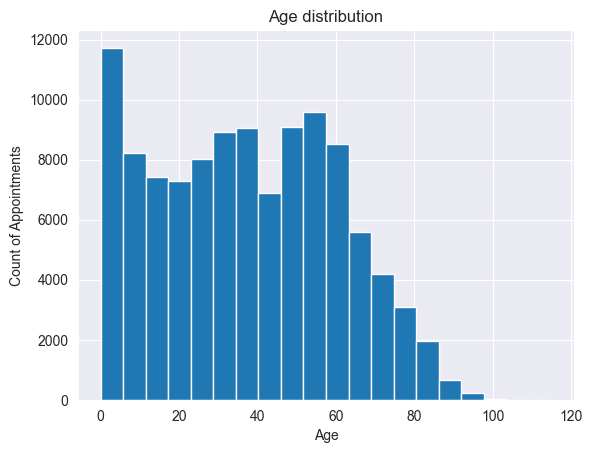

In [42]:
# Count of appointments against Age
g = df.Age.hist(bins=20)
g.set(xlabel= 'Age', ylabel= 'Count of Appointments', title= 'Age distribution')
plt.show()

In [43]:
# barplot function
def bar_plot(xdata, ydata, gxlabel, gylabel, gtitle, gerrwidth=None, gpalette=None):
    g = sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)
    g.set(xlabel = gxlabel, ylabel = gylabel, title = gtitle)
    return g

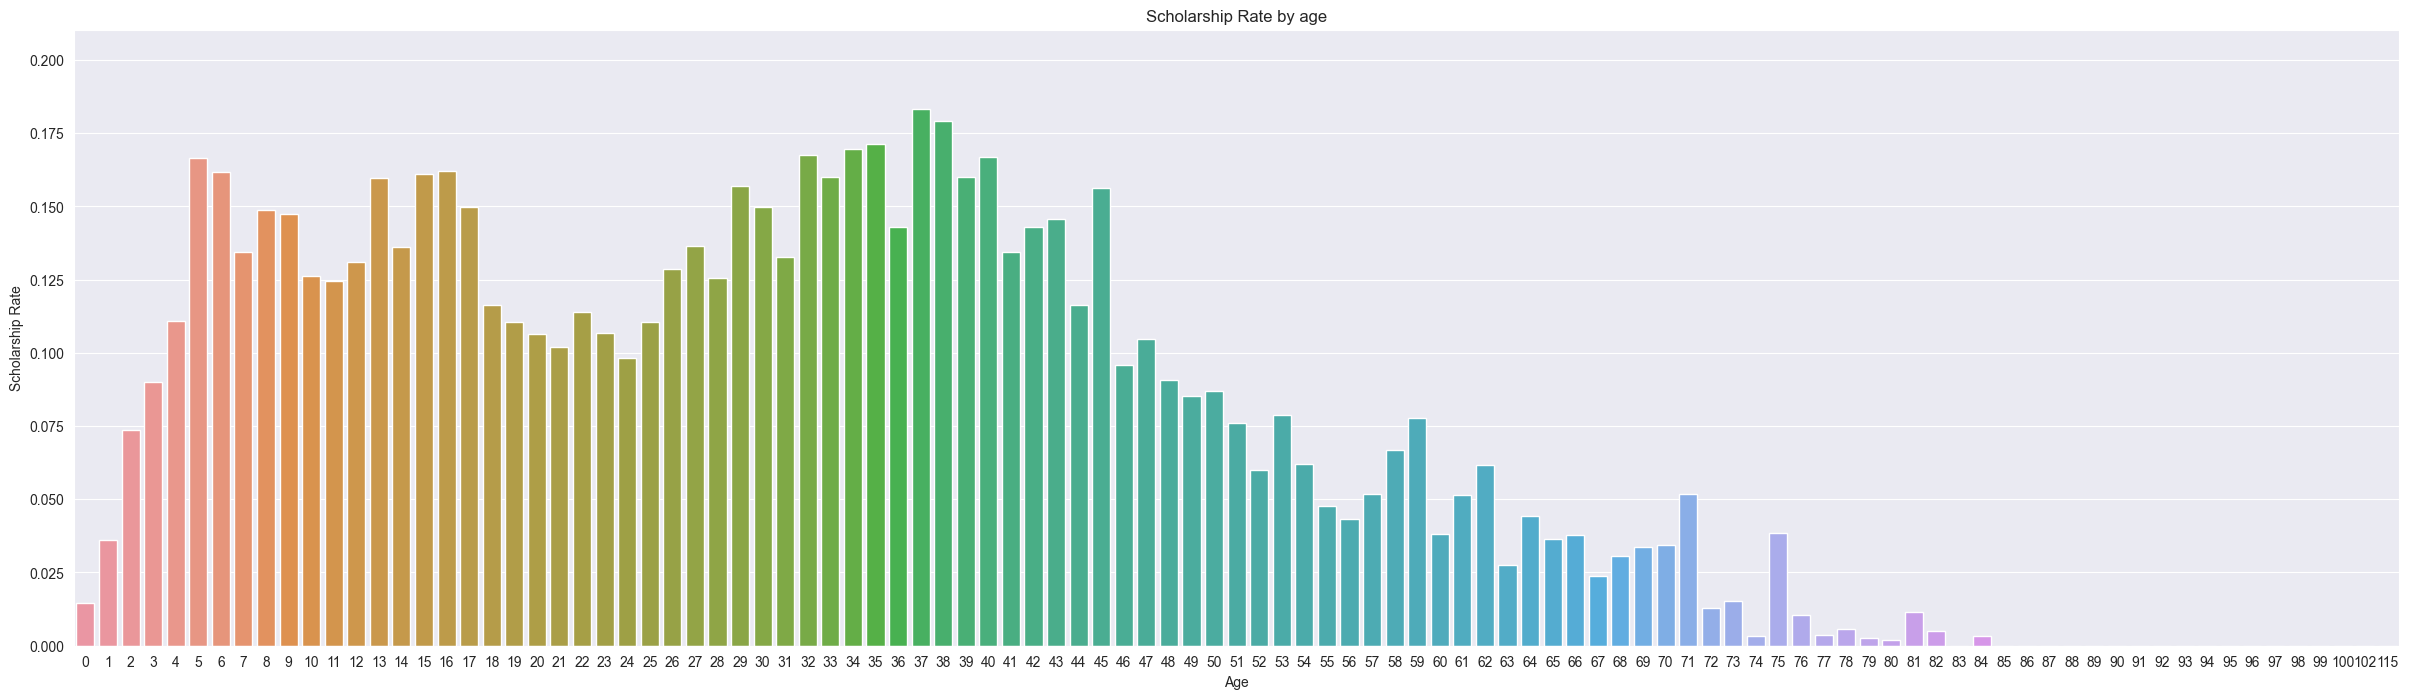

In [44]:
# Proportion of appointments of patients on scholarship according to age
plt.figure(figsize=(30, 8))
bar_plot(df['Age'],
         df['Scholarship'],
         'Age',
         'Scholarship Rate',
         'Scholarship Rate by age',
         0)
plt.show()

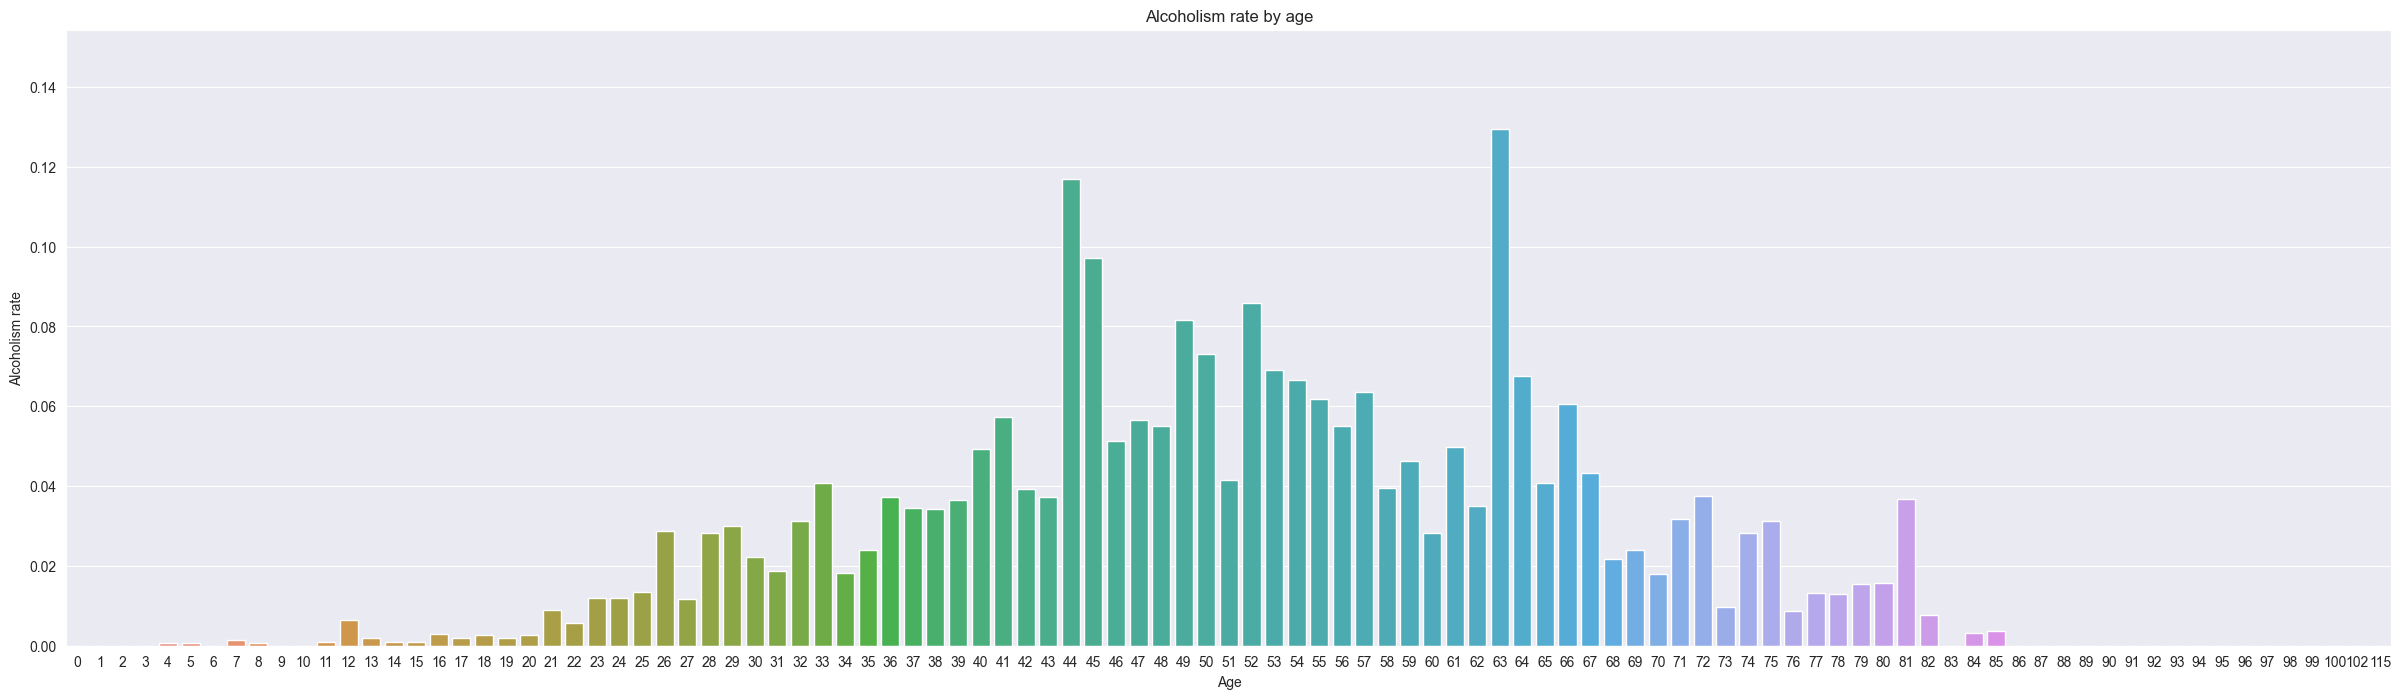

In [45]:
# how alcoholism is distributed among patients scheduling appointments by age
# the most endangered group are patients between their 40s and 60s
plt.figure(figsize=(30,8))
bar_plot(df['Age'], df['Alcoholism'], 'Age', 'Alcoholism rate', 'Alcoholism rate by age', 0)
plt.show()

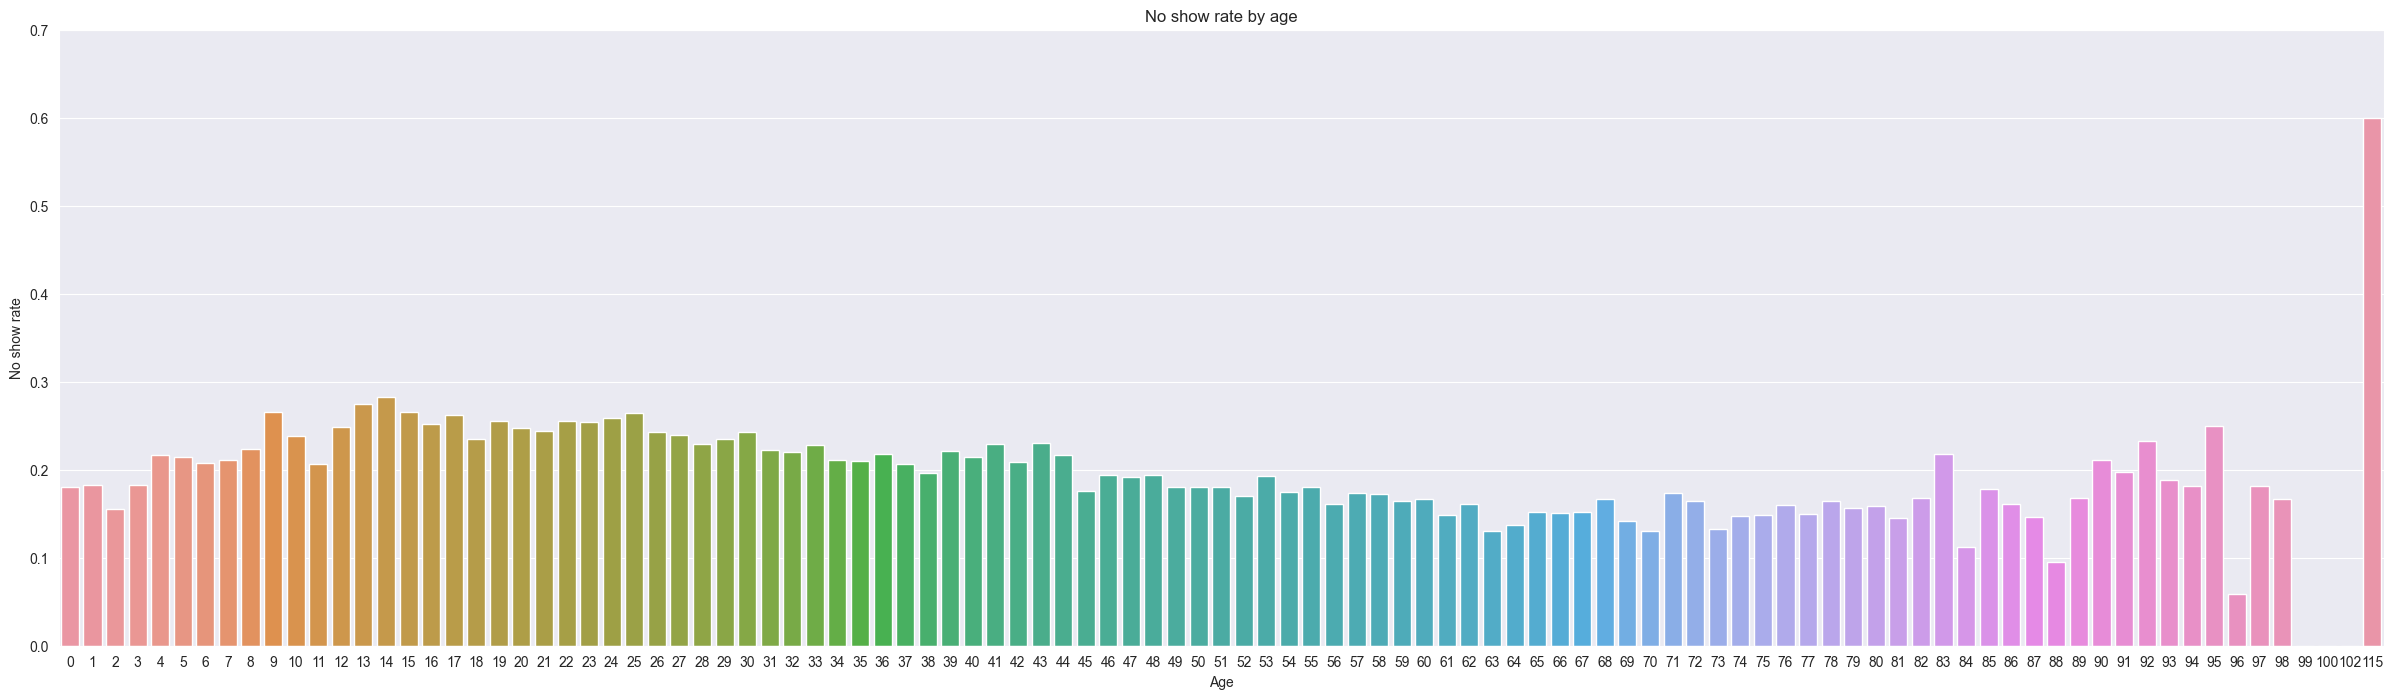

In [46]:
# there seems to be a decreasing no show rate as age increases between ages 15-80
plt.figure(figsize=(30,8))
plt.ylim(0,0.7)
bar_plot(df['Age'], df['NoShow'], 'Age', 'No show rate', 'No show rate by age', 0)
plt.show()

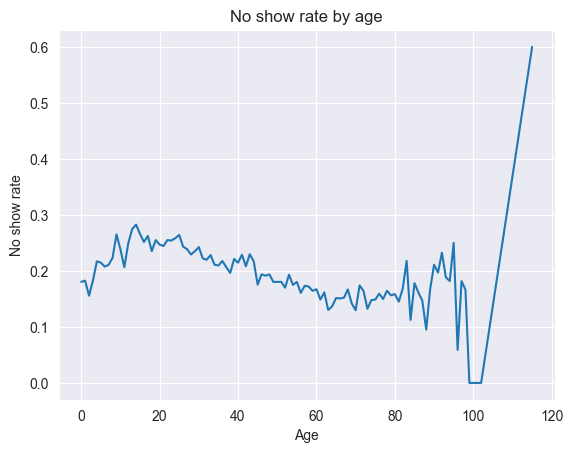

In [47]:
# the above is also confirmed by the following plot
# there are fewer data points for ages higher than 90 (check histogram above), that is why the upper end is so volatile
y_means = df['NoShow'].groupby(df['Age']).mean()
x_age = df['Age'].unique()
x_age = sorted(x_age)
plt.errorbar(x = x_age, y = y_means)
plt.title('No show rate by age')
plt.xlabel('Age')
plt.ylabel('No show rate')
plt.show()

##### Handicaps

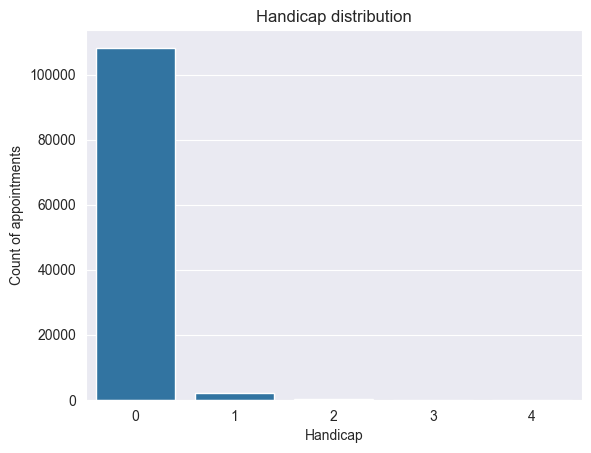

In [48]:
# most appointments are made by patients with no handicap
count_plot(df, 'Handicap', 'Handicap', 'Count of appointments', 'Handicap distribution', sns.color_palette()[0])
plt.show()

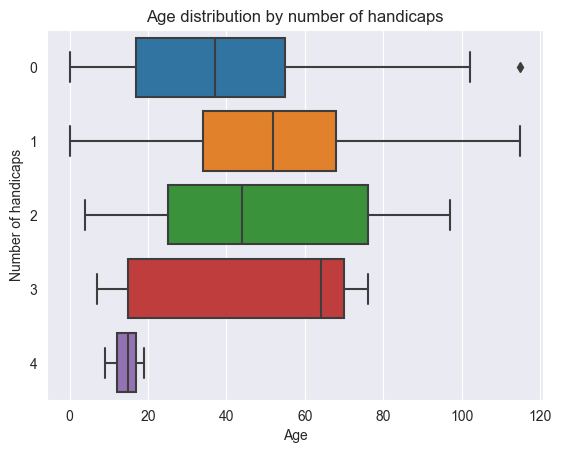

In [49]:
# age distribution for different handicap groups
# age distribution of patients with 4 handicaps is very different because we only have a very small sample of these patients
g = sns.boxplot(data = df, x = 'Age', y = 'Handicap')
g.set(xlabel='Age', ylabel='Number of handicaps', title='Age distribution by number of handicaps')
plt.show()

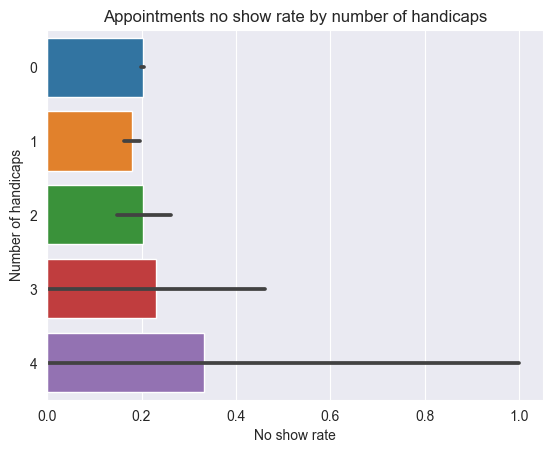

In [50]:
# number of handicaps does not make much of a difference in showing up
# (we can disregard 3 and 4 handicaps because there are just a few data points, as is suggested by the large error bars and distribution chart above)
g = sns.barplot(x = df['NoShow'], y = df['Handicap'])
g.set(xlabel='No show rate', ylabel='Number of handicaps', title='Appointments no show rate by number of handicaps')
plt.show()

##### Neighborhood

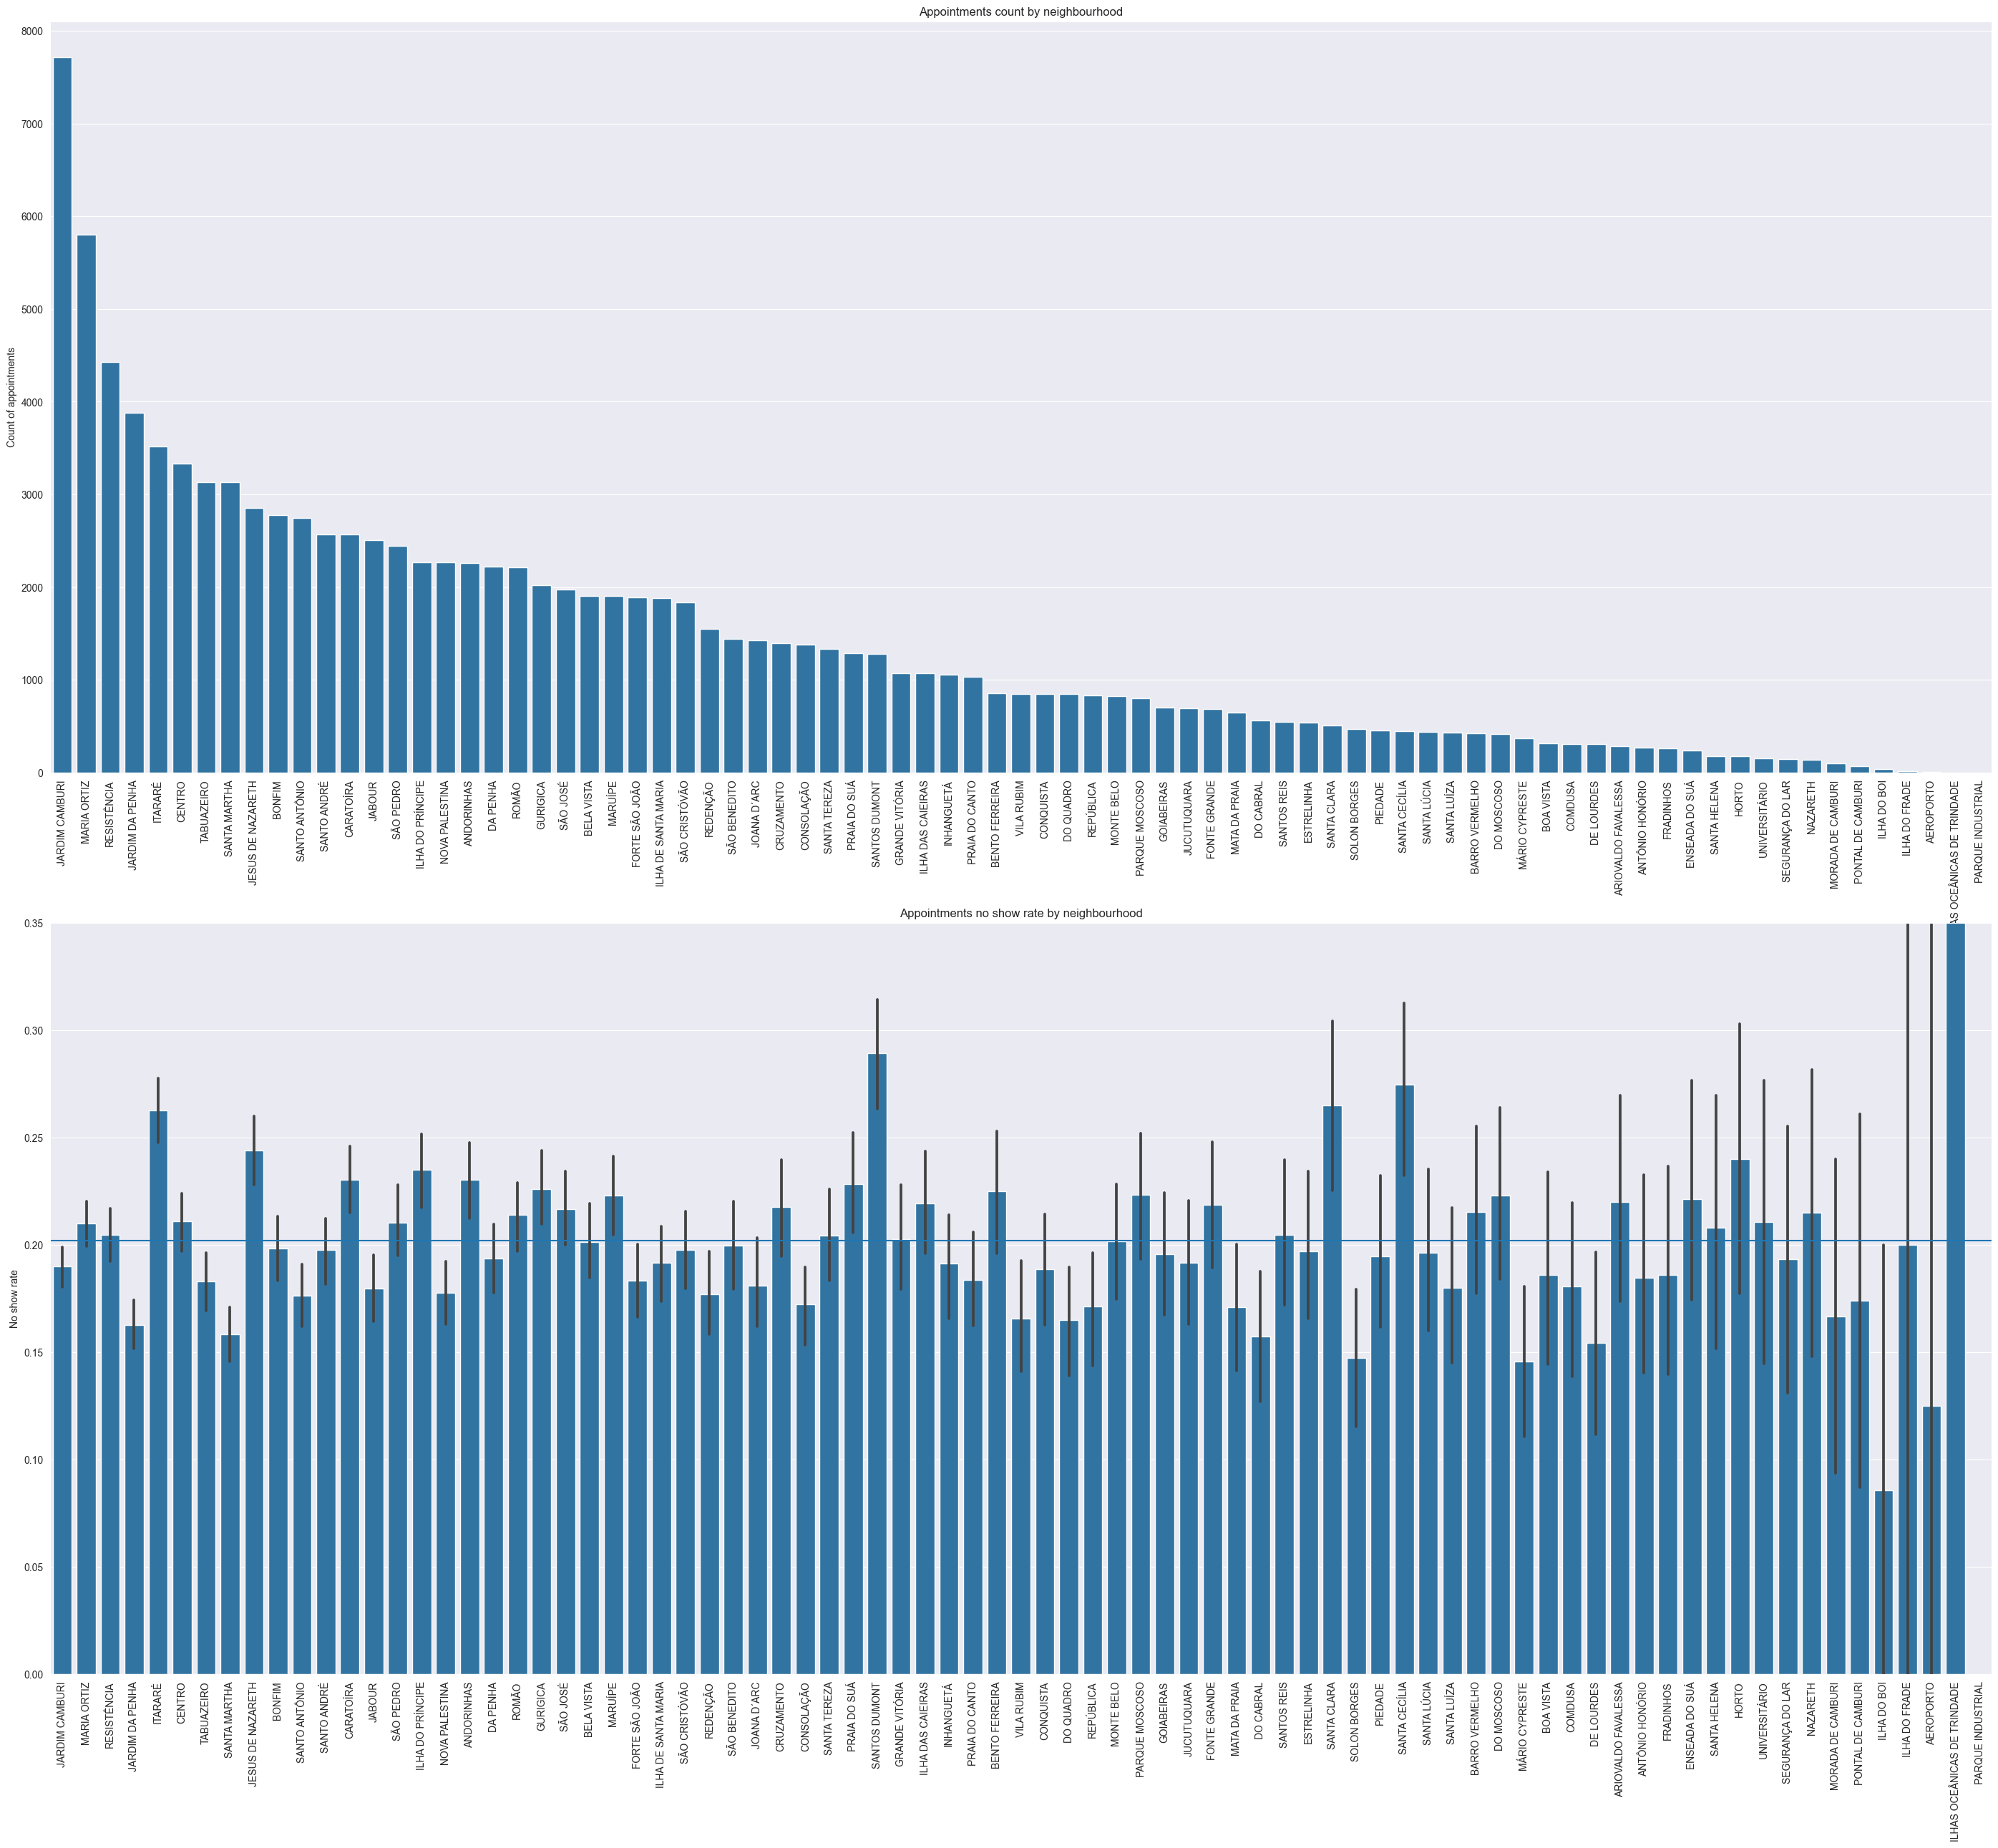

In [51]:
# share of neighborhoods
# there are a couple of very large neighborhoods by a number of appointments
plt.figure(figsize=(35,30))

plt.subplot(2, 1, 1)
plt.xticks(rotation=90)
g = sns.countplot(data = df, x = 'Neighbourhood', order = df['Neighbourhood'].value_counts().index, \
                  color=sns.color_palette()[0])
g.set(ylabel = 'Count of appointments', title = 'Appointments count by neighbourhood')

# neighborhoods do not deviate widely from the overall 20% no show rate
plt.subplot(2, 1, 2)
plt.xticks(rotation=90)
g = sns.barplot(x = df['Neighbourhood'], y = df['NoShow'], order = df['Neighbourhood'].value_counts().index, \
                color=sns.color_palette()[0]);
g.set_title('Appointments no show rate by neighbourhood')
g.set(ylabel='No show rate', ylim=(0,0.35), xlabel='')
g.axhline(noshow_proportion)

plt.show()

##### Gender

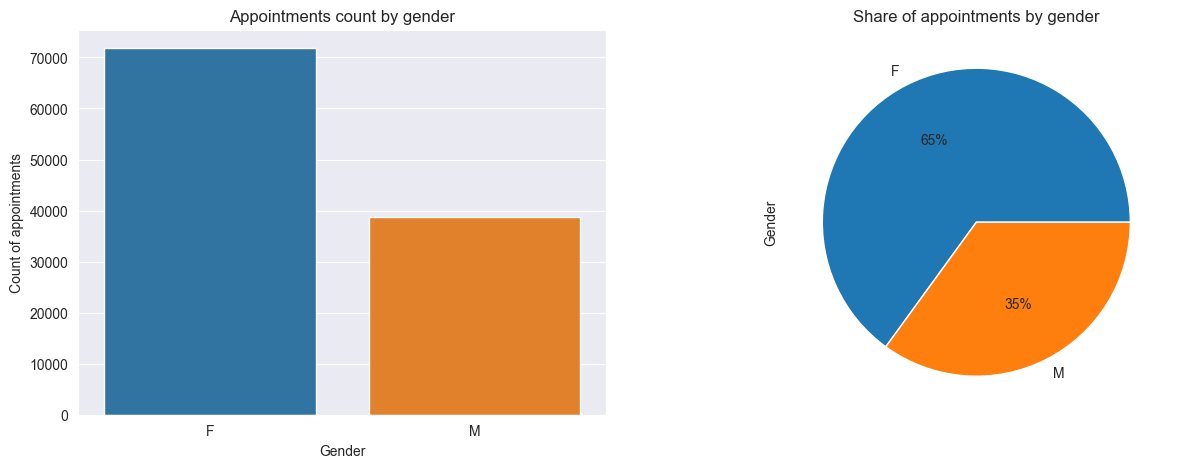

In [52]:
# there are more females scheduling appointments

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
count_plot(df, 'Gender', 'Gender', 'Count of appointments', 'Appointments count by gender')

plt.subplot(1,2,2)
g2 = df.Gender.value_counts().plot(kind='pie',autopct='%1.0f%%')
g2.set(title = 'Share of appointments by gender')

plt.show()

Females seem to be either in more need of medical appointments or simply taking better care of their health.
Let's check below whether this also means that they miss fewer of their appointments than males do.

In [53]:
# number of appointments by gender
gender_totals = df['Gender'].value_counts()
gender_totals

F    71840
M    38687
Name: Gender, dtype: int64

In [54]:
# calculate noshow counts by gender
noshow_by_gender = df.groupby(['Gender', 'NoShow']).count()['Age']
noshow_by_gender

Gender  NoShow
F       False     57246
        True      14594
M       False     30962
        True       7725
Name: Age, dtype: int64

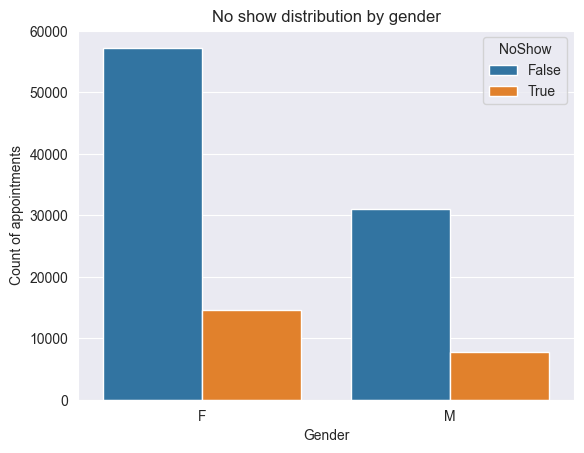

In [55]:
# plotting these counts does not help for distinguishing gender difference in no shows much because 
# there are many more female patients in our data
g = sns.countplot(data = df, x = 'Gender', hue = 'NoShow')
g.set(ylabel = 'Count of appointments', title = 'No show distribution by gender')
plt.show()

In [56]:
# calculating frequencies of noshows for females
noshow_proportions_female = noshow_by_gender['F'] / gender_totals['F']
noshow_proportions_female

NoShow
False    0.796854
True     0.203146
Name: Age, dtype: float64

In [57]:
# calculating frequencies of noshows for males
noshow_proportions_male = noshow_by_gender['M'] / gender_totals['M']
noshow_proportions_male

NoShow
False    0.800321
True     0.199679
Name: Age, dtype: float64

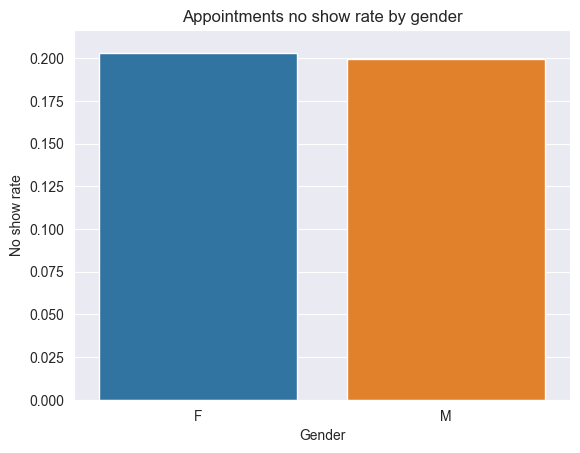

In [58]:
# plot mean of no-show

bar_plot(df['Gender'], df['NoShow'], 'Gender', 'No show rate', 'Appointments no show rate by gender', 0)
plt.show()

There is no large difference in noshow proportion among male and female patients.  

Let's now see the distribution of no shows for boolean characteristics:

##### Other patient characteristics

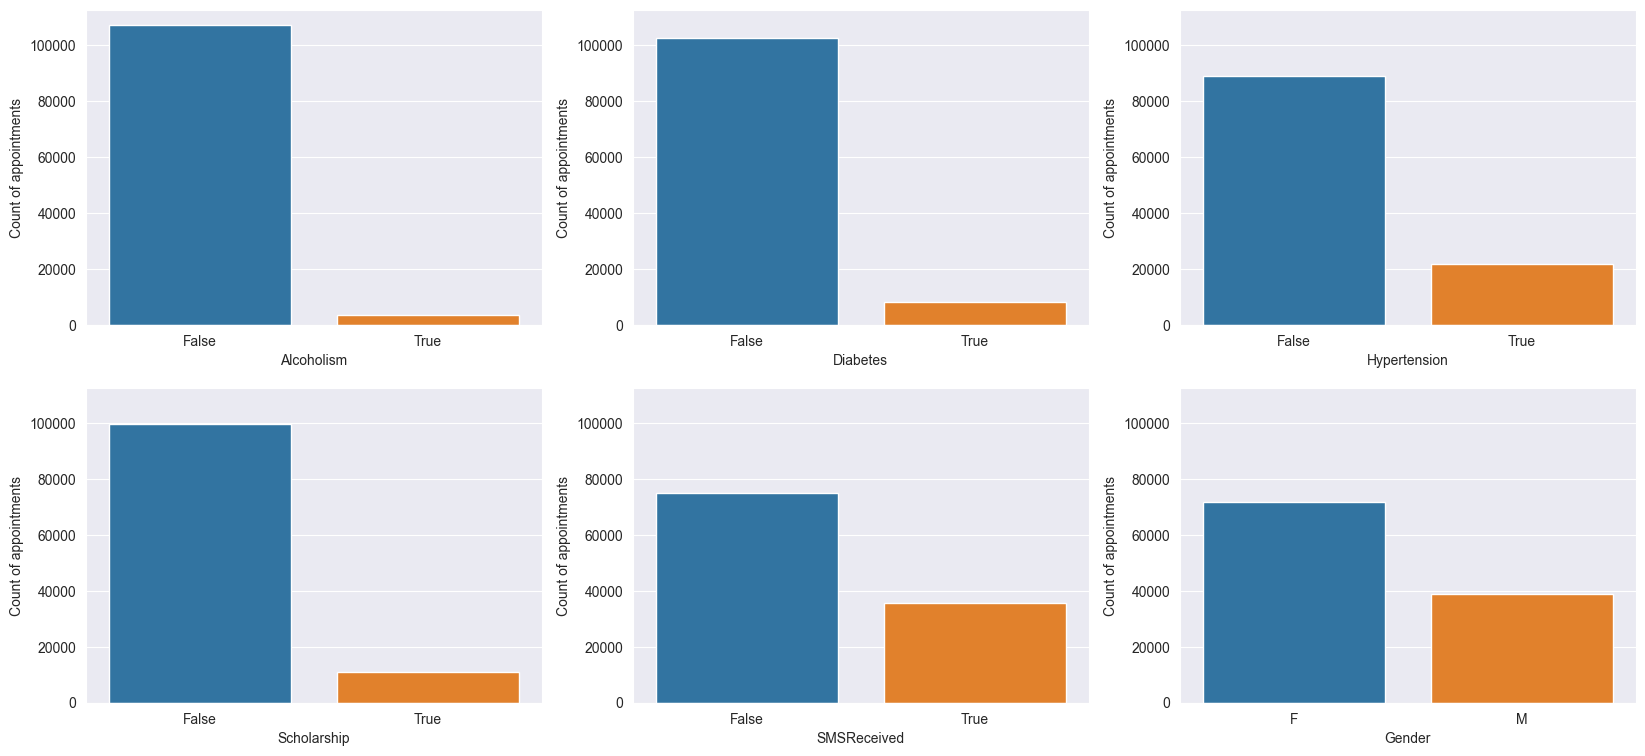

In [59]:
# subplots with amounts of appointments per characteristic value
plt.figure(figsize = [20, 9])

plt.subplot(2, 3, 1)
g1 = count_plot(df, 'Alcoholism', 'Alcoholism', 'Count of appointments', '')

plt.subplot(2, 3, 2)
count_plot(df, 'Diabetes', 'Diabetes', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 3)
count_plot(df, 'Hypertension', 'Hypertension', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 4)
count_plot(df, 'Scholarship', 'Scholarship', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 5)
count_plot(df, 'SMSReceived', 'SMSReceived', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 6)
count_plot(df, 'Gender', 'Gender', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.show()

Among available boolean characteristics, we can hypothesize the following:  

    - There is a large number of appointments for which patients were reminded by an SMS, which could decrease the no show rate, let's investigate it below.  
    - Quite a lot of appointments was made by patients with hypertension and this group could be more likely not to miss the appointment because they need to get their medication regularly. The same could hold for diabetes patients.  
    - Alcoholism patients could be more likely to miss their appointments due to their addiction issues compared with non-alcoholic patients.  
Let's plot no show rates to see what patterns there are in the data.

In [60]:
# plot details function to be used in the following bar charts
def plot_details(plot):
    plot.set(ylim=(0,0.3))
    plot.axhline(noshow_proportion, color='black')
    plt.ylim(g1.get_ylim())

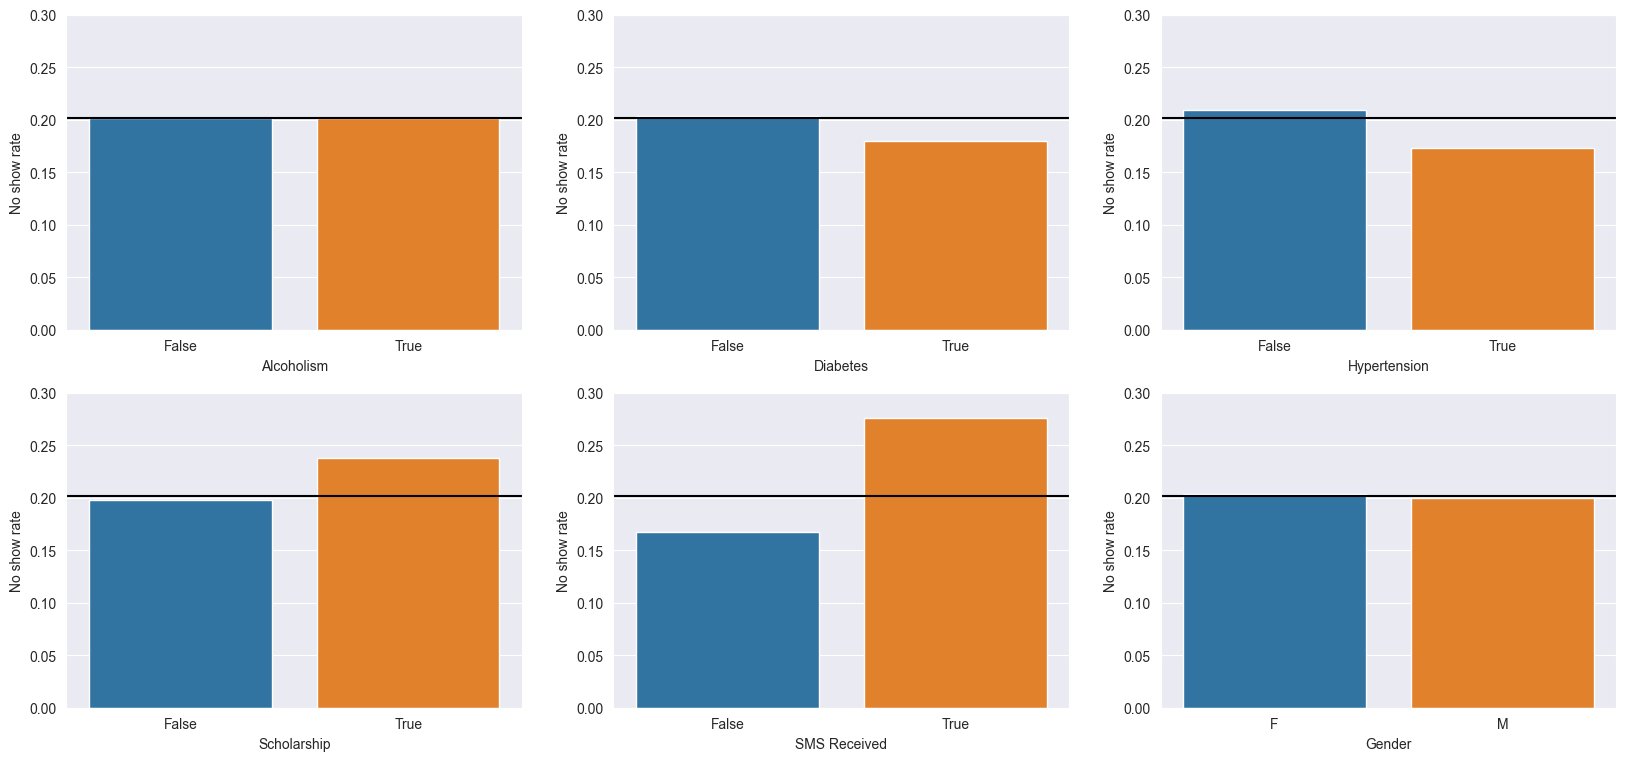

In [61]:
# subplots with no show rates per characteristic
# the overall no show rate is shown by a horizontal line
plt.figure(figsize = [20, 9])

plt.subplot(2, 3, 1)
g1 = bar_plot(df['Alcoholism'], df['NoShow'], 'Alcoholism', 'No show rate', '', 0)
plot_details(g1)

plt.subplot(2, 3, 2)
g2 = bar_plot(df['Diabetes'], df['NoShow'], 'Diabetes', 'No show rate', '', 0)
plot_details(g2)

plt.subplot(2, 3, 3)
g3 = bar_plot(df['Hypertension'], df['NoShow'], 'Hypertension', 'No show rate', '', 0)
plot_details(g3)

plt.subplot(2, 3, 4)
g4 = bar_plot(df['Scholarship'], df['NoShow'], 'Scholarship', 'No show rate', '', 0)
plot_details(g4)

plt.subplot(2, 3, 5)
g5 = bar_plot(df['SMSReceived'], df['NoShow'], 'SMS Received', 'No show rate', '', 0)
plot_details(g5)

plt.subplot(2, 3, 6)
g6 = bar_plot(df['Gender'], df['NoShow'], 'Gender', 'No show rate', '', 0)
plot_details(g6)

plt.show()

The plots reveal the following:  

    - Alcoholism makes no difference in no show rate.  
    - Appointments of patients with hypertension or diabetes have lower no show up rate than those without the disease.  
    - Appointments of patients on scholarship or with a received SMS have higher no show rates than appointments without a scholarship or a received SMS, respectively.  

In [69]:
# low no show rate is expected for the below combination of characteristics
combined_issues = df.query('Diabetes == True and Hypertension == True and Handicap != 0')
len(combined_issues)

358

In [70]:
noshows_combined_issues = df.query('NoShow == True and Diabetes == True and Hypertension == True and Handicap != 0')
len(noshows_combined_issues)

55

In [71]:
# the expectation is confirmed
noshow_share_combined_issues = len(noshows_combined_issues) / len(combined_issues)
noshow_share_combined_issues

0.15363128491620112

In [72]:
# high no show rate is expected for the below combination of characteristics
combined_issues2 = df.query('Scholarship == True and SMSReceived == True')
len(combined_issues2)

3505

In [73]:
noshows_combined_issues2 = df.query('NoShow == True and Scholarship == True and SMSReceived == True')
len(noshows_combined_issues2)

1184

In [74]:
# the expectation is confirmed
noshow_share_combined_issues2 = len(noshows_combined_issues2) / len(combined_issues2)
noshow_share_combined_issues2

0.3378031383737518

* When looking at appointments of patients with a handicap, diabetes, and hypertension combined, we see that this group has a no show rate of only 15%.  
* On the other hand, appointments of patients on scholarship which also received an SMS have a no show rate of almost 34%.

#### 2. Does it matter how long in advance the appointments are being scheduled for the future no-show share?

In [75]:
# count number of days between appointment scheduled day and appointment day
datediff = df['AppointmentDay'] - df['ScheduledDay']
datediff = pd.to_timedelta(datediff,'D')
datediff.describe()

count                        110527
mean      9 days 17:08:34.161960425
std      15 days 05:51:27.891504122
min               -7 days +10:10:40
25%        -1 days +15:41:31.500000
50%                 3 days 11:22:18
75%         14 days 07:41:34.500000
max               178 days 13:19:01
dtype: object

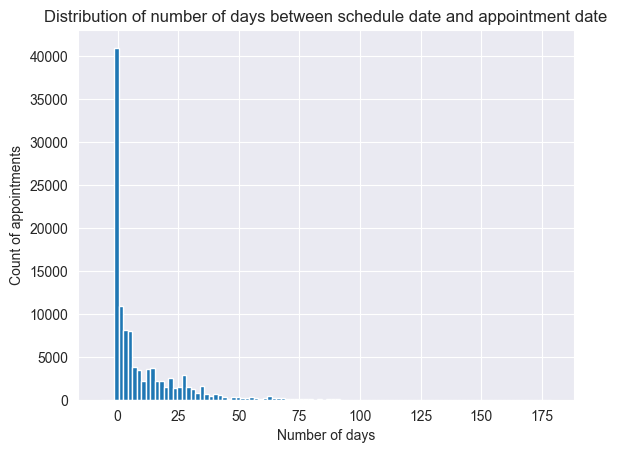

In [76]:
# extract just days from the calculated difference
datediff = round(datediff / np.timedelta64(1, 'D')).astype('int')

# distribution of date differences - there are many appointments with schedule and appointment at the same day, 
# which means that patients are probably not scheduling in advance
# this would suggest that no shows for day difference equal to 0 should be close to 0%, let's look into it below
datediff.hist(bins=100)
plt.xlabel('Number of days')
plt.ylabel('Count of appointments')
plt.title('Distribution of number of days between schedule date and appointment date')
plt.show()

In [77]:
# merge datediff to df
df['DateDiff'] = datediff
len(df.query('DateDiff < 0'))

12161

In [78]:
# there are 12161 appointments with negative day difference
# almost all of these have difference of -1
len(df.query('DateDiff == -1'))

12158

In [79]:
# this is the case because when the appointment happens on the same date as it is scheduled, the scheduled day includes time, 
# but the appointment date does NOT
# these should therefore be changed to diff = 0
df.query('DateDiff < 0').head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DateDiff
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,False,-1
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,False,-1
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,False,-1
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,-1
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,False,-1


In [80]:
# let's change these remaining 3 negative cases to 0, too
df.query('DateDiff < -1').head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DateDiff
55226,7.896294e+12,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,False,False,False,False,1,False,True,-2
64175,2.425226e+13,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,False,False,False,False,0,False,True,-2
71533,9.982316e+14,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,False,False,False,False,0,False,True,-7


In [81]:
# change negative differences to 0 because they must be errors
df['DateDiff'] = df['DateDiff'].clip(lower=0)

In [82]:
# Let's check how many appointments scheduled and happening on the same day
len(df.query('DateDiff == 0'))

40972

In [83]:
# check DateDiff summary 
df['DateDiff'].describe()

count    110527.000000
mean          9.913397
std          15.163468
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         179.000000
Name: DateDiff, dtype: float64

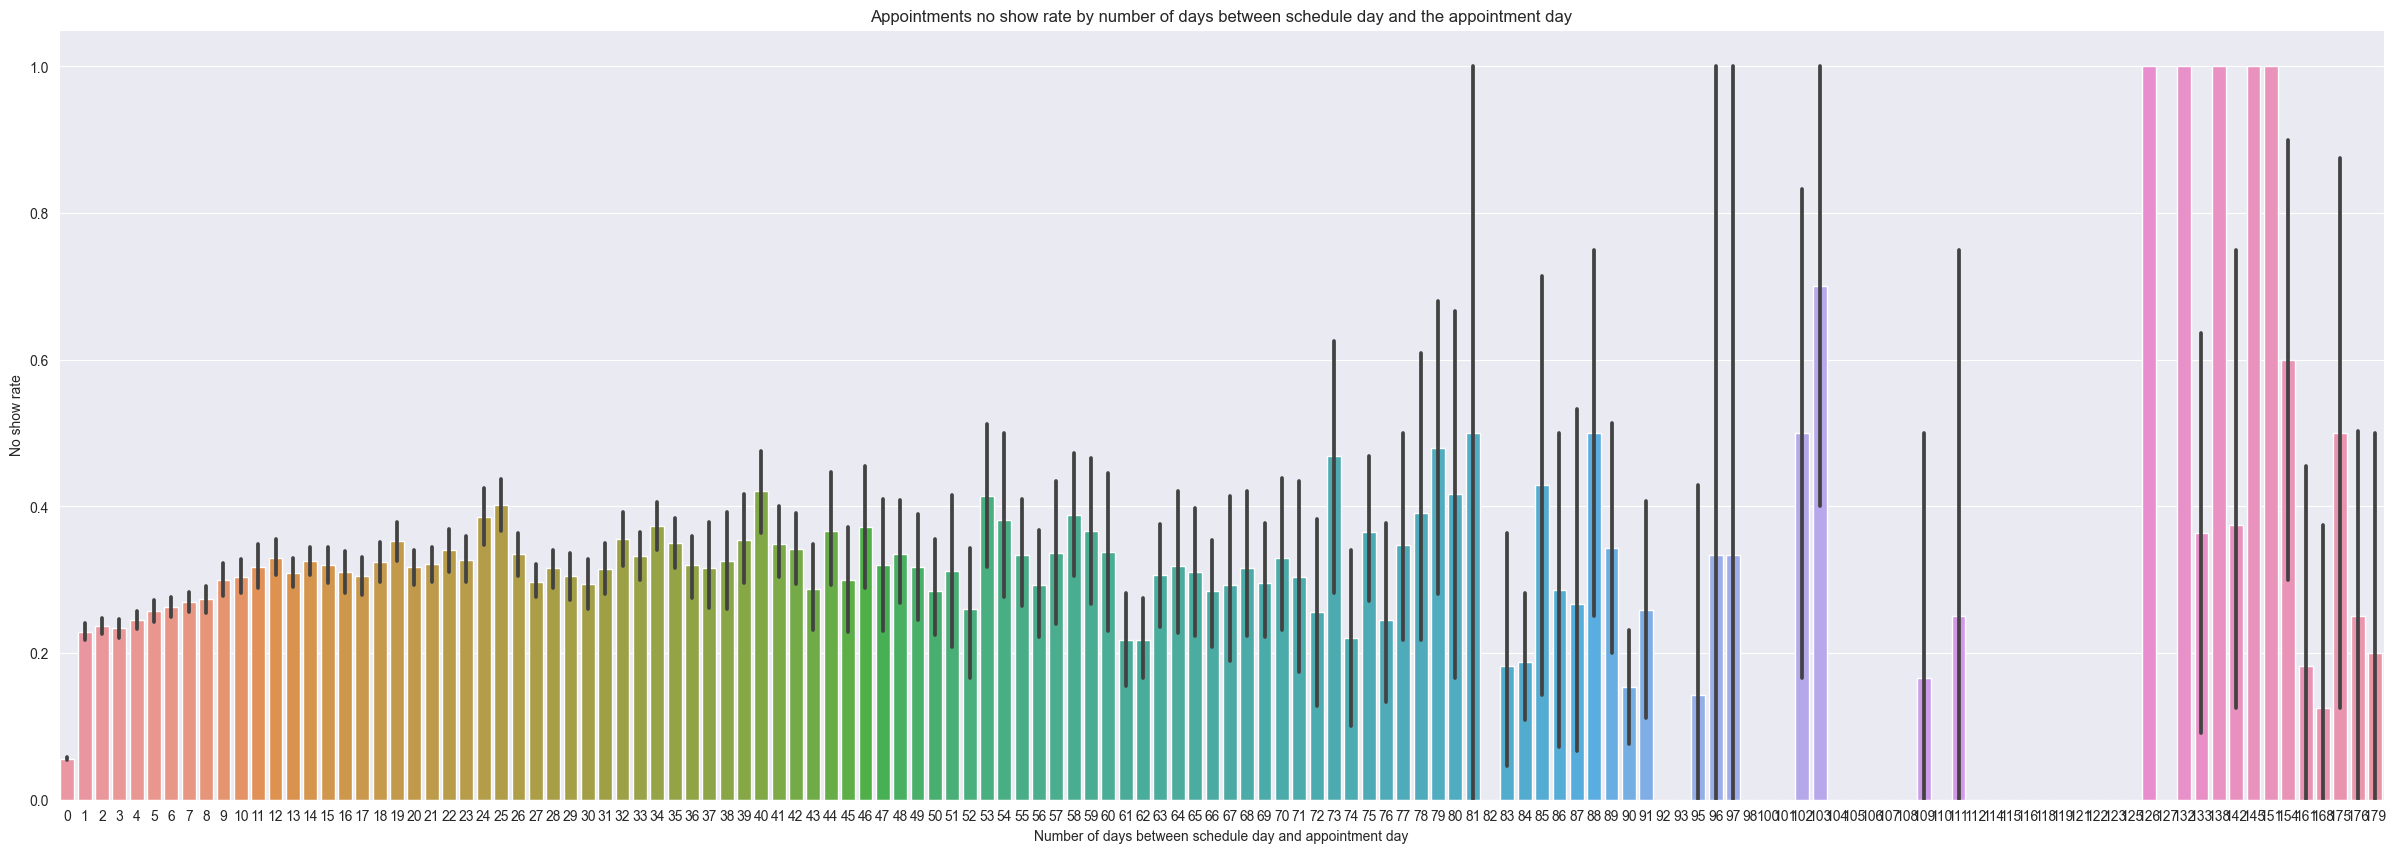

In [84]:
plt.figure(figsize=(30,10))
bar_plot(df['DateDiff'], df['NoShow'], 'Number of days between schedule day and appointment day', 'No show rate', \
         'Appointments no show rate by number of days between schedule day and the appointment day')
plt.show()

We can see from the above chart that appointments happening on the scheduled day (most of which are probably in reality not being scheduled at all) largely decrease the no show rate to the overall 20%.
Most of the other date difference values have no show rates higher than 20%.

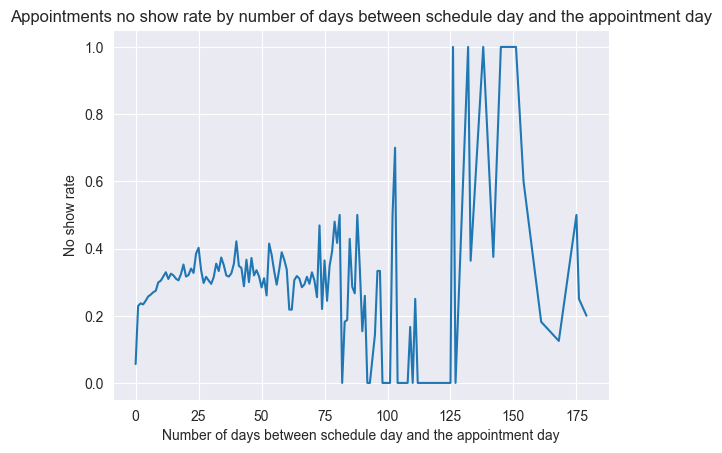

In [85]:
# there are generally fewer data points for date diff higher than 50 (we know that from the histogram higher up),
# that is why the upper end is so volatile
y_means = df['NoShow'].groupby(df['DateDiff']).mean()
x_datediff = df['DateDiff'].unique()
x_datediff = sorted(x_datediff)
plt.errorbar(x = x_datediff, y = y_means)
plt.title('Appointments no show rate by number of days between schedule day and the appointment day')
plt.xlabel('Number of days between schedule day and the appointment day')
plt.ylabel('No show rate')
plt.show()

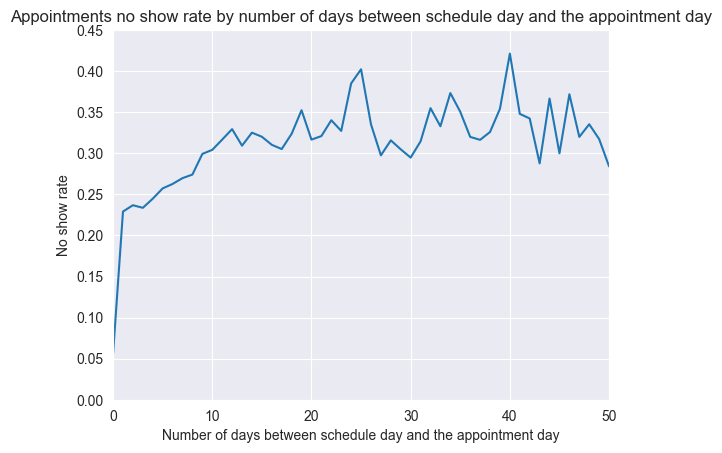

In [86]:
# looking more closely to the relevant part to see the pattern
y_means = df['NoShow'].groupby(df['DateDiff']).mean()
x_datediff = df['DateDiff'].unique()
x_datediff = sorted(x_datediff)
plt.errorbar(x = x_datediff, y = y_means)
plt.title('Appointments no show rate by number of days between schedule day and the appointment day')
plt.xlabel('Number of days between schedule day and the appointment day')
plt.ylabel('No show rate')
plt.xlim(0,50)
plt.ylim(0,0.45)
plt.show()

Looking at this detail, we can say that it seems to matter how long in advance the appointment is scheduled.  
The increasing no show rate is visible in the first 20 days of difference. The longer the period between schedule and appointment day, the higher the no show rate in our data generally tends to be.  


Further, knowing that there are almost 41k of 0 days difference values, it might make sense to look again only at a subset which excludes these values, in which we would expect generally higher no show rates than we saw until now.  
Let's look at the main no show charts from Q1 and continue further with the shrunk data frame.  

In [87]:
# filter 0 diff days out of the data frame
df2 = df.query('DateDiff > 0')
df2.shape

(69555, 14)

In [88]:
# overall no show rate of the shrinked data set is 28.8%
noshow_proportion = df2['NoShow'].sum() / len(df2.index)
noshow_proportion

0.2878729063331177

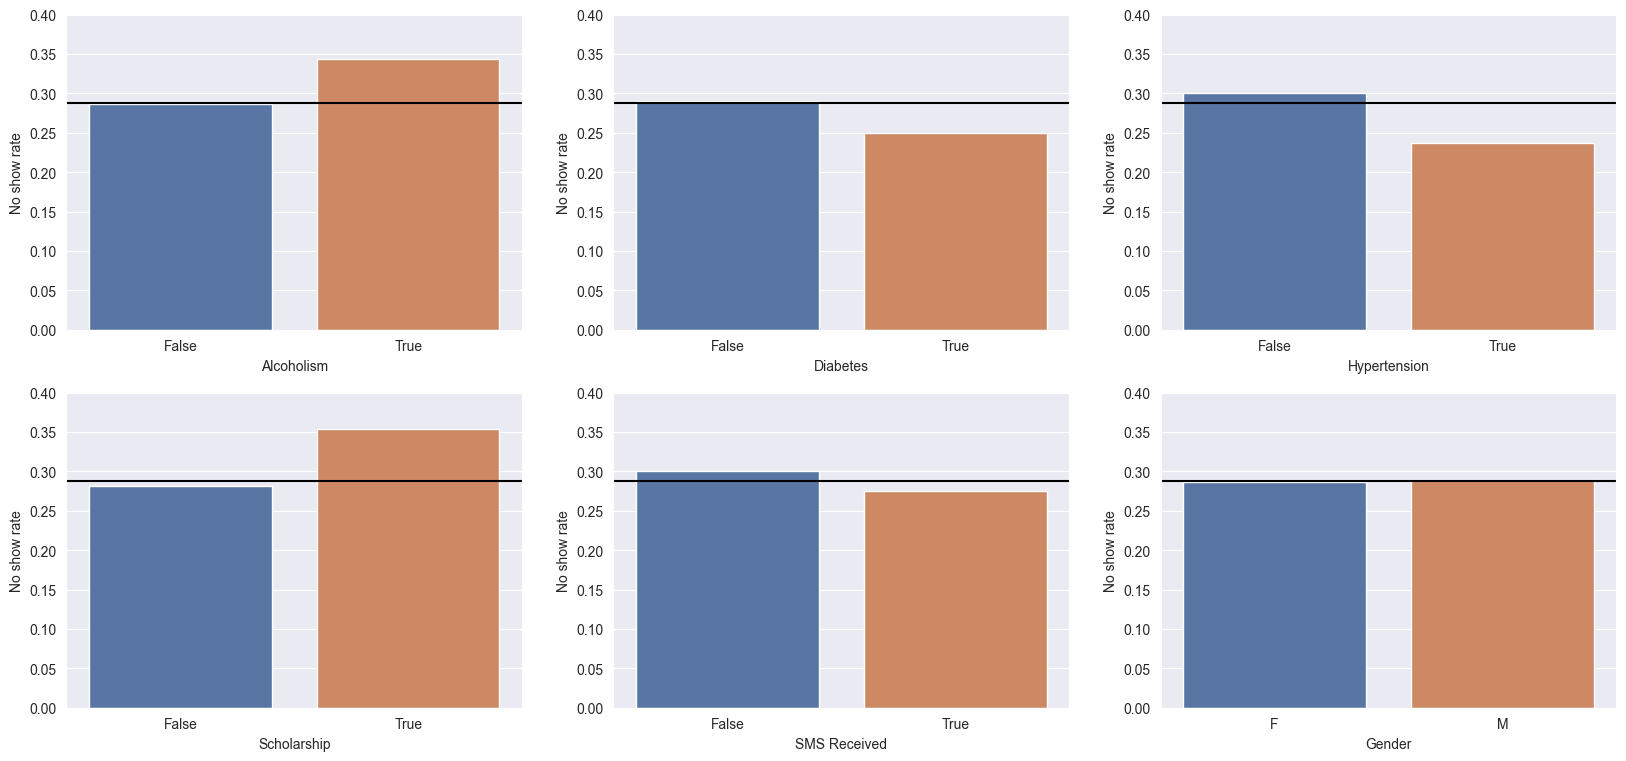

In [89]:
# subplots with no show rates per characteristic
# the overall no show rate is shown by a horizontal line
plt.figure(figsize = [20, 9])

# plot details function to be used in the following bar charts
def plot_details2(plot):
    plot.set(ylim=(0,0.4))
    plot.axhline(noshow_proportion, color='black')
    plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 1)
g1 = bar_plot(df2['Alcoholism'], df2['NoShow'], 'Alcoholism', 'No show rate', '', 0, 'deep')
plot_details2(g1)

plt.subplot(2, 3, 2)
g2 = bar_plot(df2['Diabetes'], df2['NoShow'], 'Diabetes', 'No show rate', '', 0, 'deep')
plot_details2(g2)

plt.subplot(2, 3, 3)
g3 = bar_plot(df2['Hypertension'], df2['NoShow'], 'Hypertension', 'No show rate', '', 0, 'deep')
plot_details2(g3)

plt.subplot(2, 3, 4)
g4 = bar_plot(df2['Scholarship'], df2['NoShow'], 'Scholarship', 'No show rate', '', 0, 'deep')
plot_details2(g4)

plt.subplot(2, 3, 5)
g5 = bar_plot(df2['SMSReceived'], df2['NoShow'], 'SMS Received', 'No show rate', '', 0, 'deep')
plot_details2(g5)

plt.subplot(2, 3, 6)
g6 = bar_plot(df2['Gender'], df2['NoShow'], 'Gender', 'No show rate', '', 0, 'deep')
plot_details2(g6)

plt.show()

Some patterns changed now when we only look at appointments scheduled at least one day in advance.  
Appointments of alcoholics are skipped more frequently than the average appointments are.  
Receiving an SMS reminder now has a positive effect on no show rate, i.e. appointments with an SMS have lower no show rate than those without a reminder and in general.  
Findings for other characteristics did not change.

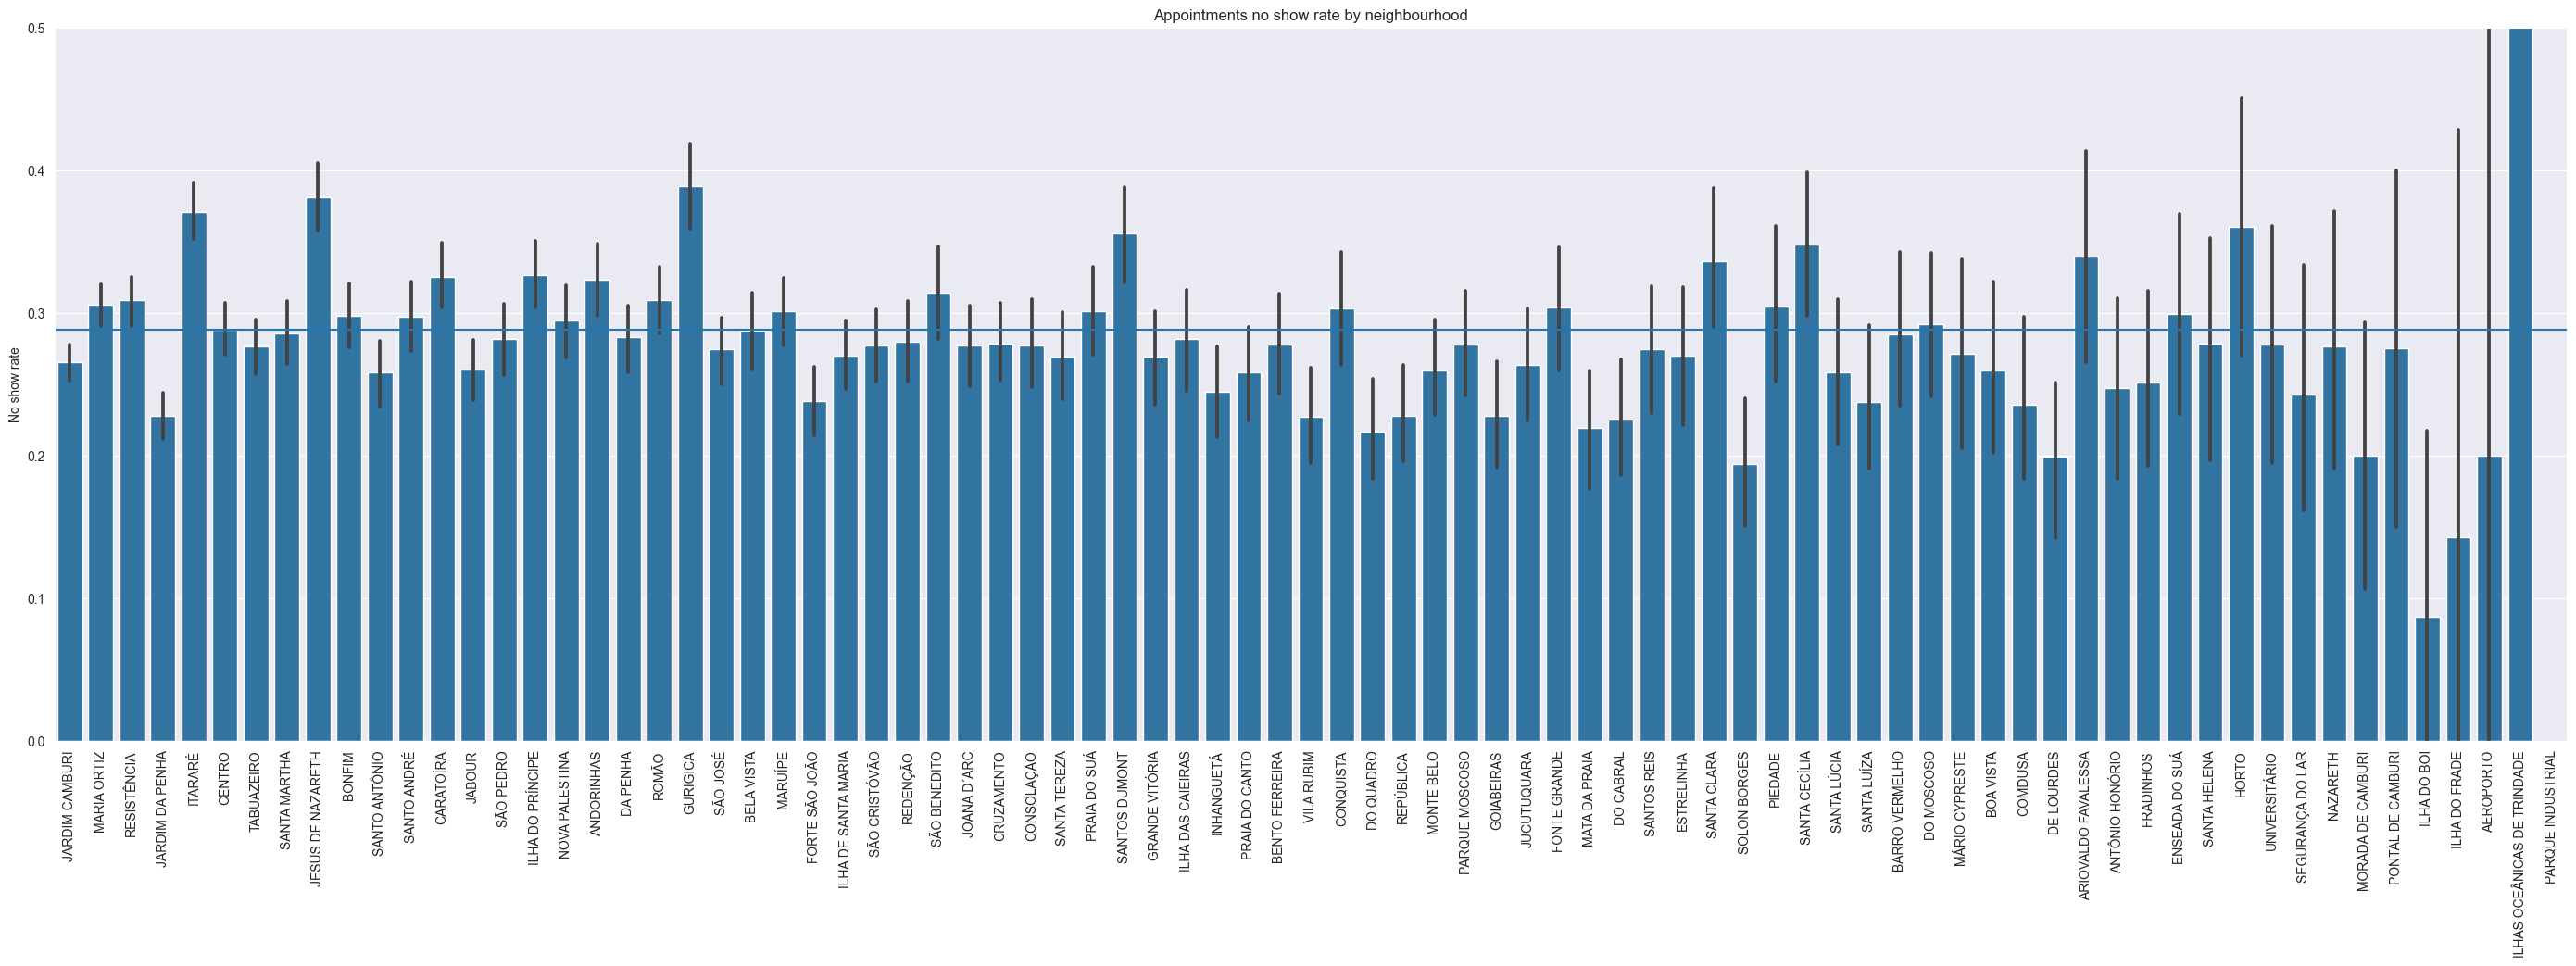

In [90]:
# neighbourhoods still do not deviate widely from the overall no show rate
plt.figure(figsize=(35,10))
plt.xticks(rotation=90)
g = sns.barplot(x = df2['Neighbourhood'], y = df2['NoShow'], order = df['Neighbourhood'].value_counts().index, \
                color=sns.color_palette()[0]);
g.set_title('Appointments no show rate by neighbourhood')
g.set(ylabel='No show rate', ylim=(0,0.5), xlabel='')
g.axhline(noshow_proportion)

plt.show()

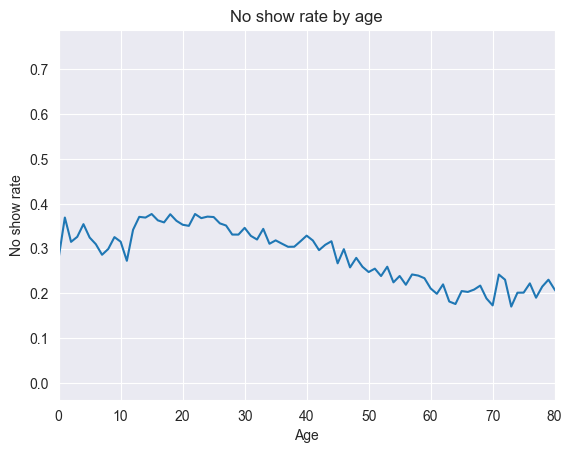

In [91]:
# no show rate still decreases with age in the filtered data
y_means = df2['NoShow'].groupby(df2['Age']).mean()
x_age = df2['Age'].unique()
x_age = sorted(x_age)
plt.errorbar(x = x_age, y = y_means)
plt.title('No show rate by age')
plt.xlabel('Age')
plt.ylabel('No show rate')
plt.xlim(0,80)
plt.show()

#### 3.  Are no shows more frequent on Fridays (before the weekend)?

In [92]:
# add appointment day of week to data frame
dow = df2['AppointmentDay'].dt.day_name()
df2 = df2.assign(AppointmentDayOfWeek = dow)
df2.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DateDiff,AppointmentDayOfWeek
5,9.598513e+13,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,False,True,False,False,0,False,False,2,Friday
6,7.336882e+14,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,False,False,False,False,0,False,True,1,Friday
7,3.449833e+12,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,False,False,False,False,0,False,True,1,Friday
9,7.812456e+13,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,False,False,False,False,0,False,False,1,Friday
10,7.345362e+14,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,False,False,False,False,0,False,False,1,Friday


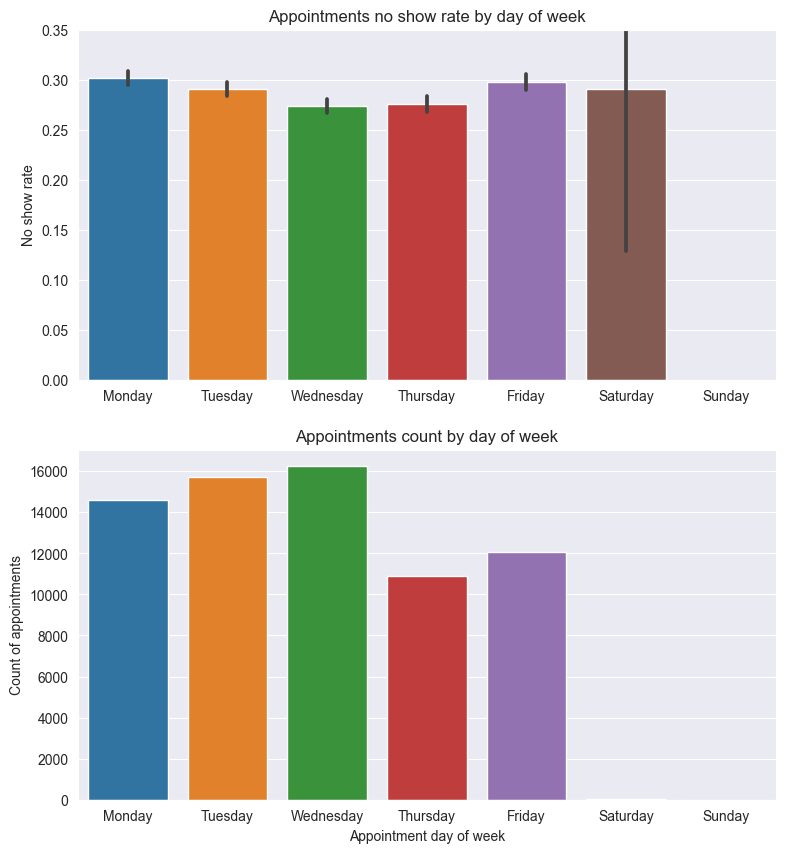

In [93]:
week_key = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize = [9, 10])

plt.subplot(2, 1, 1)
g1 = sns.barplot(x = df2['AppointmentDayOfWeek'], y = df2['NoShow'], order = week_key)
g1.set(xlabel='', ylabel='No show rate', ylim=(0,0.35), title='Appointments no show rate by day of week')

plt.subplot(2, 1, 2)
g2 = sns.countplot(data = df2, x = 'AppointmentDayOfWeek', order = week_key)
g2.set(xlabel='Appointment day of week', ylabel='Count of appointments', title='Appointments count by day of week')

plt.show()

No show rate on Fridays is a bit higher than on Tue, Wed, or Thu, but it is very comparable to no show rate on Mondays.  
Mon, Tue, and Wed are the favorite days for appointments.

#### 4. Does sending an SMS reminder help to reduce the no-shows?

In [95]:
# NoShow and SMS received correlation now has a negative sign, but it is quite small
df2.corr(numeric_only=True).style.background_gradient(cmap='Greens')

,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMSReceived,NoShow,DateDiff
PatientId,1.000000,-0.004521,-0.002145,-0.002676,-0.000331,0.005801,-0.006891,0.003761,0.005174
Age,-0.004521,1.000000,-0.103266,0.500123,0.284006,0.080361,-0.041356,-0.102492,-0.005551
Scholarship,-0.002145,-0.103266,1.000000,-0.027639,-0.025817,0.030758,0.019571,0.046608,-0.028398
Hypertension,-0.002676,0.500123,-0.027639,1.000000,0.424942,0.085314,-0.034695,-0.057317,-0.048467
Diabetes,-0.000331,0.284006,-0.025817,0.424942,1.000000,0.024605,-0.029571,-0.023947,-0.046917
Alcoholism,0.005801,0.080361,0.030758,0.085314,0.024605,1.000000,-0.008762,0.019660,-0.029270
SMSReceived,-0.006891,-0.041356,0.019571,-0.034695,-0.029571,-0.008762,1.000000,-0.027333,0.176027
NoShow,0.003761,-0.102492,0.046608,-0.057317,-0.023947,0.019660,-0.027333,1.000000,0.055927
DateDiff,0.005174,-0.005551,-0.028398,-0.048467,-0.046917,-0.029270,0.176027,0.055927,1.000000


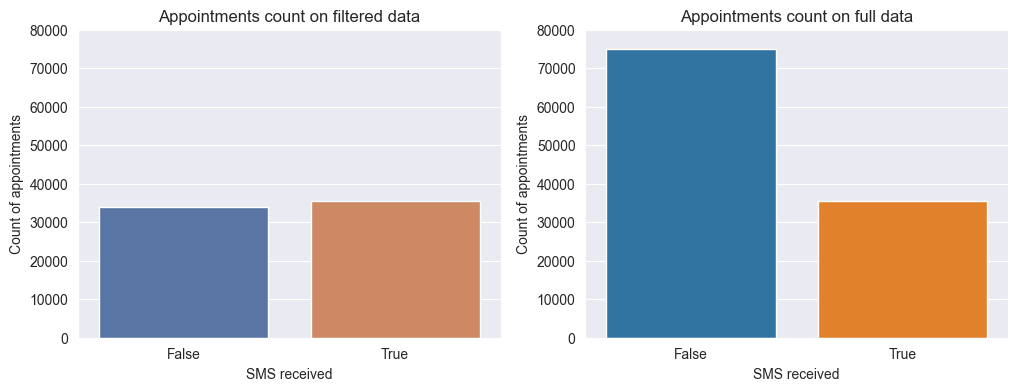

In [96]:
# subplot for comparison with the full data

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
g1 = count_plot(df2, 'SMSReceived', 'SMS received', 'Count of appointments', 'Appointments count on filtered data', \
                None, 'deep')
g1.set(ylim=(0, 80000))

plt.subplot(1, 2, 2)
g2 = count_plot(df, 'SMSReceived', 'SMS received', 'Count of appointments', 'Appointments count on full data')
plt.ylim(g1.get_ylim())

plt.show()

In [97]:
# 35482 appointments received an SMS
SMS = df2['SMSReceived'].value_counts()
SMS

True     35482
False    34073
Name: SMSReceived, dtype: int64

In [98]:
SMS_proportion = df2['SMSReceived'].sum() / len(df2.index)
SMS_proportion

0.5101286751491625

That makes around 51% of appointments with a received SMS  
This is much a larger share than on the full data set  
  
We filtered out data with day difference between scheduling and appointment of 0.
These filtered out appointments did not receive an SMS. It makes sense that patients do not get an SMS for appointments on the same day.
The filtered data therefore has much more comparable group sizes for appointments with and without an SMS reminder.

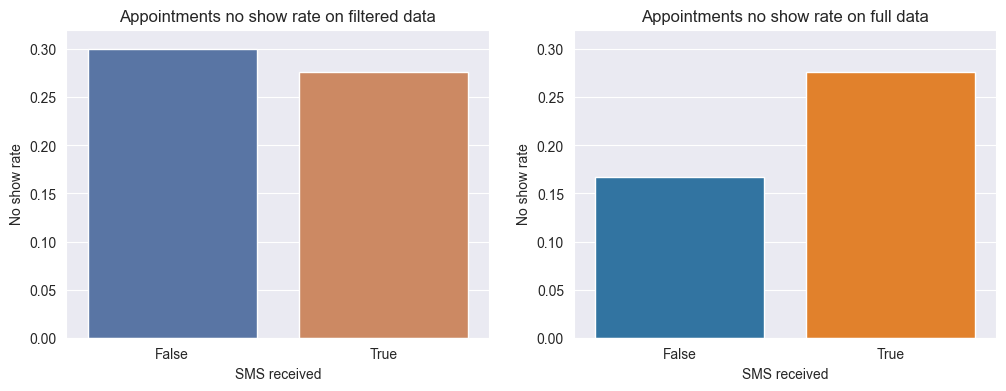

In [99]:
# subplots for comparison
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
# no show rate for appointments with an SMS reminder is now lower than for appointments with no reminder
g1 = bar_plot(df2['SMSReceived'], df2['NoShow'], 'SMS received', 'No show rate', 'Appointments no show rate on filtered data', \
         0, 'deep')

plt.subplot(1, 2, 2)
g2 = bar_plot(df['SMSReceived'], df['NoShow'], 'SMS received', 'No show rate', 'Appointments no show rate on full data', \
         0)
plt.ylim(g1.get_ylim())

plt.show()

In [100]:
# no show rate for appointments with SMS received
noshow_share_SMS = len(df2.query('NoShow == True and SMSReceived == True')) / len(df2.query('SMSReceived == True'))
noshow_share_SMS

0.27574544839637

In [101]:
# no show rate for appointments with SMS received
show_share_SMS = len(df2.query('NoShow == True and SMSReceived == False')) / len(df2.query('SMSReceived == False'))
show_share_SMS

0.30050186364570186

Appointments no show rate is lower for cases when SMS was sent (27.6%) than for those without a reminder (30%) and also lower than the overall no show rate of 28.8% (for the filtered data set).